## Training a SVM using Linear classifier

In [7]:
from sklearn.svm import SVC
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,5
%matplotlib inline

In [8]:
iris=datasets.load_iris()
x=iris.data
y=iris.target


In [9]:
test_size=0.3
random_state=0
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=random_state)

In [10]:
scalar_class=StandardScaler()
# fit the scalar to the training feature set ONLY
scalar_class.fit(x_train)
x_train_std=scalar_class.transform(x_train)
x_test_std=scalar_class.transform(x_test)

In [11]:
x_train_std=x_train_std[:,[2,3]]
x_test_std=x_test_std[:,[2,3]]

In [15]:
c=1.0
kernel='linear'
random_state=0
svm=SVC(kernel=kernel,C=c,random_state=random_state)
svm.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred=svm.predict(x_test_std)
accuracy_score(y_test,y_pred)*100


97.777777777777771

In [18]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [19]:



def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

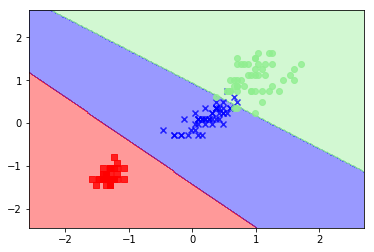

In [20]:
x_combined=np.vstack((x_train_std,x_test_std))
y_combine=np.hstack((y_train,y_test))
x=x_combined
y=y_combine
classifier=svm
test_idx=range(105,150)
plot_decision_regions(X=x,y=y,classifier=classifier,test_idx=test_idx)


### And you can see that this is better than logistic regression and there is margin of error which was missing in logistic regression

# Non linear classification


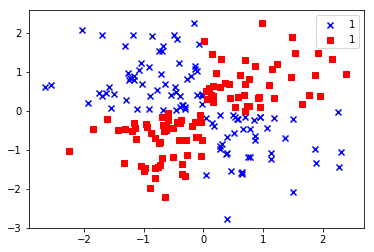

In [25]:
np.random.seed(0)
x_xor=np.random.randn(200,2)
y_xor=np.logical_xor(x_xor[:,0]>0,x_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
x=x_xor[y_xor==1,0]
y=x_xor[y_xor==1,1]
color='blue'
marker='x'
plt.scatter(x,y,c=color,marker=marker,label=1)
x=x_xor[y_xor==-1,0]
y=x_xor[y_xor==-1,1]
color='red'
marker='s'
plt.scatter(x,y,c=color,marker=marker,label=1)
plt.ylim(-3.0)
plt.legend()

#### You can see that this dataset is non-linear seperable

In [27]:
kernel='rbf'
random_state=0
gamma=0.1
c=10.0

svm=SVC(kernel=kernel,random_state=random_state,gamma=gamma,C=c)
svm.fit(x_xor,y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

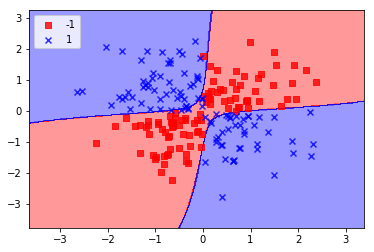

In [28]:
x=x_xor
y=y_xor
classifier=svm
plot_decision_regions(X=x,y=y,classifier=classifier)
plt.legend(loc='upper left')

#### And you can see that we were able to classify this non-linear data using RBF kernel